# Japanese whisky review Analysis using NLP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [2]:
#loading the dataset in pandas dataframe
data=pd.read_csv('japanese_whisky_review.csv')

In [3]:
#check first five rows of the dataset
data.head()

,Unnamed: 0,Bottle_name,Brand,Title,Review_Content
0,1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Over-hyped ...
1,2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious! sugared red fruits and sweet with a...
2,3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...
3,4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,"This is a terrible Yamazaki. Very young, unsh..."
4,5,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it - fresh but not thin ...


In [4]:
#check last five rows of the dataset
data.tail()

,Unnamed: 0,Bottle_name,Brand,Title,Review_Content
1125,1126,Nikka 1995 Single Cask Coffey Grain,Nikka,Great whisky,Really enjoyed the flavour of this whisky... G...
1126,1127,Nikka 1995 Single Cask Coffey Grain,Nikka,Phenomenal.,Given the slightly racist tone to the guy at t...
1127,1128,Nikka 1995 Single Cask Coffey Grain,Nikka,Great.,The particular distillation process makes this...
1128,1129,Nikka 1995 Single Cask Coffey Grain,Nikka,"It's whisky, not wine",That's probably why the previous poster though...
1129,1130,Nikka 1995 Single Cask Coffey Grain,Nikka,Japs dont know anything about making wine,Its like buying a bottle of Grey Goose thinkin...


In [5]:
#check shape of the dataset
data.shape

(1130, 5)

In [6]:
#check missing values of the dataset
data.isnull().sum()

Unnamed: 0        0
Bottle_name       0
Brand             0
Title             0
Review_Content    0
dtype: int64

In [7]:
#data more infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1130 non-null   int64 
 1   Bottle_name     1130 non-null   object
 2   Brand           1130 non-null   object
 3   Title           1130 non-null   object
 4   Review_Content  1130 non-null   object
dtypes: int64(1), object(4)
memory usage: 44.3+ KB


In [8]:
#check mathamtic 
data.describe()

,Unnamed: 0
count,1130.000000
mean,565.500000
std,326.347208
min,1.000000
25%,283.250000
50%,565.500000
75%,847.750000
max,1130.000000


In [9]:
data.corr()

,Unnamed: 0
Unnamed: 0,1.0


In [10]:
#select only used full columns
data = data[['Brand','Review_Content']]

In [11]:
#check firsr five rows of the dataset
data.head()

,Brand,Review_Content
0,Yamazaki,Dull taste. High price. No finish. Over-hyped ...
1,Yamazaki,Delicious! sugared red fruits and sweet with a...
2,Yamazaki,I am not a whisky expert but i really love the...
3,Yamazaki,"This is a terrible Yamazaki. Very young, unsh..."
4,Yamazaki,First time and I like it - fresh but not thin ...


In [12]:
#Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review_Content"] = data["Review_Content"].apply(clean)

In [13]:
#check first reviws after cleaning dataset
data['Review_Content'][0]

'dull tast high price finish overhyp disappoint'

In [14]:
#check brand value
data['Brand'].value_counts()

Yamazaki    457
Nikka       392
Hibiki      196
Hakushu      85
Name: Brand, dtype: int64

/Users/vikky/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brand', ylabel='count'>

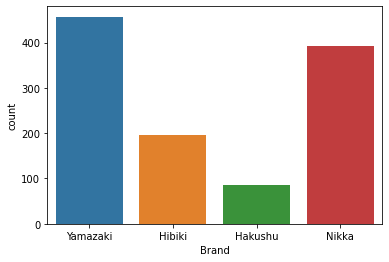

In [15]:
#plot Brand value
sns.countplot(data['Brand'])

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
#Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review_Content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review_Content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review_Content"]]
data = data[["Review_Content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 8]
[nltk_data]     nodename nor servname provided, or not known>


                                      Review_Content  Positive  Negative  \
0     dull tast high price finish overhyp disappoint     0.000     0.519   
1  delici sugar red fruit sweet morish cinnamon a...     0.273     0.000   
2  whiski expert realli love tast experi would de...     0.404     0.000   
3  terribl yamazaki  young unsherri finish  yamaz...     0.342     0.075   
4  first time like  fresh thin sweet depth know l...     0.549     0.000   

   Neutral  
0    0.481  
1    0.727  
2    0.596  
3    0.583  
4    0.451  


In [18]:
data.head()

,Review_Content,Positive,Negative,Neutral
0,dull tast high price finish overhyp disappoint,0.000,0.519,0.481
1,delici sugar red fruit sweet morish cinnamon a...,0.273,0.000,0.727
2,whiski expert realli love tast experi would de...,0.404,0.000,0.596
3,terribl yamazaki young unsherri finish yamaz...,0.342,0.075,0.583
4,first time like fresh thin sweet depth know l...,0.549,0.000,0.451


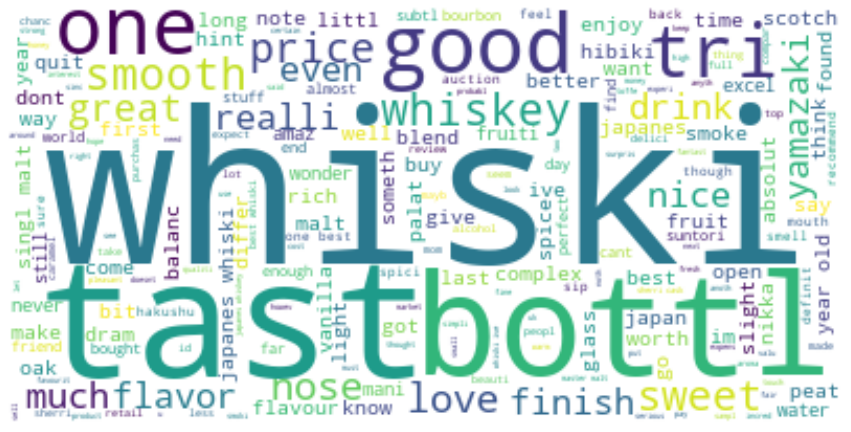

In [19]:
#w let’s have a look at the kind of words people use in the positive reviews of TikTok:
positive =' '.join([i for i in data['Review_Content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

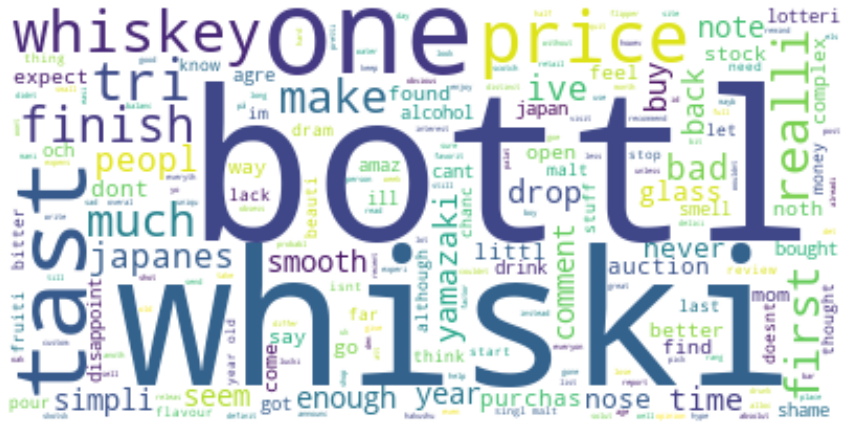

In [20]:
#Now let’s have a look at the kind of words people often use in the negative reviews of TikTok:
negative =' '.join([i for i in data['Review_Content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#Sentiment Score of the User Of wine
X = sum(data['Positive'])
Y = sum(data['Negative'])
Z = sum(data['Neutral'])
def sentiment_score(a, b, c):
    if(a>b) and (a>c):
        print("Positive")
    elif(b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(X, Y, Z)    

Neutral


In [22]:
print("Positive", X)
print("Negative", Y)
print("Neutral", Z)

Positive 313.44000000000034
Negative 48.167999999999964
Neutral 767.3949999999993


In [23]:
data.head()

,Review_Content,Positive,Negative,Neutral
0,dull tast high price finish overhyp disappoint,0.000,0.519,0.481
1,delici sugar red fruit sweet morish cinnamon a...,0.273,0.000,0.727
2,whiski expert realli love tast experi would de...,0.404,0.000,0.596
3,terribl yamazaki young unsherri finish yamaz...,0.342,0.075,0.583
4,first time like fresh thin sweet depth know l...,0.549,0.000,0.451
